## Лабораторная работа №1:
Методы приближенного дифференцирования
данные: `CTD_22oc11_Channel+river`<br>
x - глубина (столбец "Depth,m")<br>
y - температура (столбец "Temperature,C")\

Выполнить расчет производной $y'(x)$ тремя способами:
- разностная аппроксимация вперед
- разностная аппроксимация назад
- центральная разностная аппроксимация

Формулы: Роуч П. Вычислительная гидродинамика стр.40-414


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file_path = "data/CTD_22oc11_Channel+river.csv"
with open(data_file_path, "r") as f:
    df = pd.read_csv(f, sep=";")

data = df[["Temp", "Depth [m]"]].astype(float)
depth = data.get("Depth [m]")
temp = data.get("Temp")

df.head(n=10)

,Station,Latitude [degree],Longitude [degree],Date,Time,Depth [m],Temp,Cond,Sal,O2%,O2ppm,pH,Eh,CHL,Turb,SigmaT,SoundV,Bot. Depth [m]
0,319,54.633833,19.895,11.10.2022,08:56:28.91,0.175,13.411,9.548,7.053,0.4,0.04,9.106,151.0,-0.797,4.005,4.7760,1468.69,11.4125
1,319,54.633833,19.895,11.10.2022,08:56:28.98,0.187,13.411,9.547,7.052,0.4,0.04,9.106,151.0,-0.619,2.665,4.7759,1468.69,11.4125
2,319,54.633833,19.895,11.10.2022,08:56:29.05,0.226,13.412,9.548,7.053,0.4,0.04,9.106,150.9,-0.169,1.585,4.7760,1468.70,11.4125
3,319,54.633833,19.895,11.10.2022,08:56:29.12,0.267,13.413,9.548,7.052,0.5,0.05,9.106,150.9,0.194,5.565,4.7760,1468.70,11.4125
4,319,54.633833,19.895,11.10.2022,08:56:29.20,0.323,13.413,9.547,7.052,0.5,0.05,9.105,150.9,0.432,15.265,4.7756,1468.70,11.4125
5,319,54.633833,19.895,11.10.2022,08:56:29.27,0.385,13.414,9.548,7.052,0.6,0.06,9.105,150.9,0.560,21.105,4.7763,1468.70,11.4125
6,319,54.633833,19.895,11.10.2022,08:56:29.34,0.438,13.414,9.549,7.053,0.7,0.07,9.105,150.9,0.637,22.557,4.7772,1468.71,11.4125
7,319,54.633833,19.895,11.10.2022,08:56:29.41,0.497,13.415,9.549,7.053,0.7,0.07,9.104,150.9,0.685,22.365,4.7771,1468.71,11.4125
8,319,54.633833,19.895,11.10.2022,08:56:29.49,0.556,13.414,9.548,7.053,0.8,0.08,9.104,150.9,0.713,21.997,4.7773,1468.71,11.4125
9,319,54.633833,19.895,11.10.2022,08:56:29.56,0.598,13.415,9.549,7.053,0.7,0.07,9.104,151.0,0.729,21.705,4.7777,1468.71,11.4125


In [2]:
def right_derivative(X, Y):
    derivative = []
    for i in range(len(X) - 1):
        delta_Y = Y[i + 1] - Y[i]
        delta_X = X[i + 1] - X[i]
        derivative.append(delta_Y / delta_X)
        print("for X = ", X[i], "der is ", derivative[i])
    return derivative


def left_derivative(X, Y):
    derivative = []
    for i in range(1, len(X) - 1):
        delta_Y = Y[i] - Y[i - 1]
        delta_X = X[i] - X[i - 1]
        derivative.append(delta_Y / delta_X)
        print("for X = ", X[i - 1], "der is ", derivative[i - 1])
    return derivative


def central_derivative(X, Y):
    derivative = []
    for i in range(1, len(X) - 2):
        delta_Y = Y[i + 1] - Y[i - 1]
        delta_X = X[i + 1] - X[i - 1]
        derivative.append(delta_Y / delta_X)
        print("for X = ", X[i], "der is ", derivative[i - 1])
    return derivative



for X =  0.187 der is  0.019607843137278858
for X =  0.226 der is  0.025000000000008345
for X =  0.267 der is  0.01030927835050975
for X =  0.323 der is  0.008474576271181745
for X =  0.385 der is  0.008695652173908225
for X =  0.438 der is  0.00892857142856648
for X =  0.497 der is  0.0
for X =  0.556 der is  0.0
for X =  0.598 der is  0.01136363636363007
for X =  0.644 der is  0.010000000000012223
for X =  0.698 der is  0.00862068965518295
for X =  0.76 der is  0.0
for X =  0.825 der is  0.0
for X =  0.891 der is  0.00781249999999567
for X =  0.953 der is  0.007874015748027131
for X =  1.018 der is  0.0
for X =  1.081 der is  0.0
for X =  1.139 der is  0.008264462809912776
for X =  1.202 der is  0.007633587786255311
for X =  1.27 der is  0.0
for X =  1.334 der is  0.0
for X =  1.399 der is  0.0
for X =  1.471 der is  0.0
for X =  1.533 der is  0.0
for X =  1.566 der is  0.01369863013700301
for X =  1.606 der is  0.013157894736858213
for X =  1.642 der is  0.0
for X =  1.676 der is  0

/tmp/ipykernel_8815/1061029592.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  derivative.append(delta_Y / delta_X)
/tmp/ipykernel_8815/1061029592.py:26: RuntimeWarning: invalid value encountered in scalar divide
  derivative.append(delta_Y / delta_X)
/tmp/ipykernel_8815/1061029592.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  derivative.append(delta_Y / delta_X)
/tmp/ipykernel_8815/1061029592.py:6: RuntimeWarning: invalid value encountered in scalar divide
  derivative.append(delta_Y / delta_X)
/tmp/ipykernel_8815/1061029592.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  derivative.append(delta_Y / delta_X)
/tmp/ipykernel_8815/1061029592.py:16: RuntimeWarning: invalid value encountered in scalar divide
  derivative.append(delta_Y / delta_X)


for X =  0.835 der is  0.015624999999991326
for X =  0.899 der is  -0.014925373134320097
for X =  0.966 der is  0.016393442622941748
for X =  1.027 der is  0.0
for X =  1.081 der is  0.0
for X =  1.143 der is  -0.013157894736834801
for X =  1.219 der is  0.018181818181808126
for X =  1.274 der is  0.0
for X =  1.323 der is  0.019230769230792717
for X =  1.375 der is  -0.020833333333358777
for X =  1.423 der is  0.0
for X =  1.466 der is  -0.019999999999988898
for X =  1.516 der is  -0.02173913043477054
for X =  1.562 der is  -0.01886792452832497
for X =  1.615 der is  -0.020408163265294838
for X =  1.664 der is  -0.057692307692309826
for X =  1.716 der is  -0.03448275862070114
for X =  1.774 der is  -0.03636363636361625
for X =  1.829 der is  -0.016949152542363503
for X =  1.888 der is  -0.014285714285731731
for X =  1.958 der is  -0.018518518518508238
for X =  2.012 der is  -0.018867924528291453
for X =  2.065 der is  -0.01818181818184035
for X =  2.12 der is  -0.017857142857132944
fo

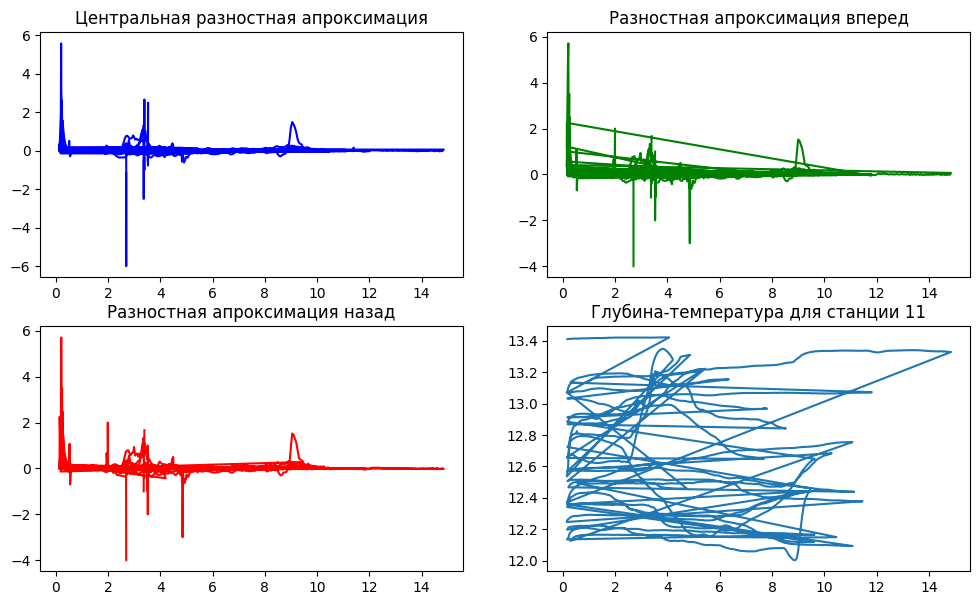

In [3]:
# Настройка размеров подложки
plt.figure(figsize=(12, 7))

# Вывод графиков
plt.subplot(2, 2, 1)
plt.plot(depth[1 : len(depth) - 2 : 1], central_derivative(depth, temp), color="blue")
plt.title("Центральная разностная апроксимация")

plt.subplot(2, 2, 2)
plt.plot(depth[:-1], right_derivative(depth, temp), color="green")
plt.title("Разностная апроксимация вперед")

plt.subplot(2, 2, 3)
plt.plot(depth[1 : len(depth) - 1 : 1], left_derivative(depth, temp), color="red")
plt.title("Разностная апроксимация назад")

plt.subplot(2, 2, 4)
plt.plot(depth, temp)
plt.title("Глубина-температура для станции 11")

plt.show()